<a href="https://colab.research.google.com/github/fighaz/PCVK_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt



Mengubah tingkat kecerahan citra
Masukkan nilai kecerahan : 50


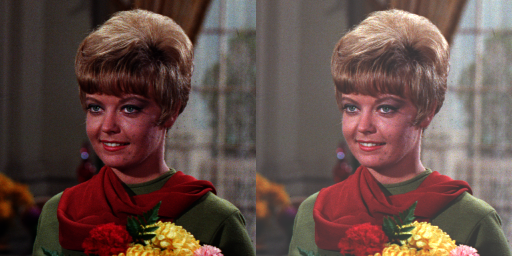

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('================================')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Masukkan nilai yang benar')
  brightness = int(input('Masukkan nilai kecerahan : '))

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TASK**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

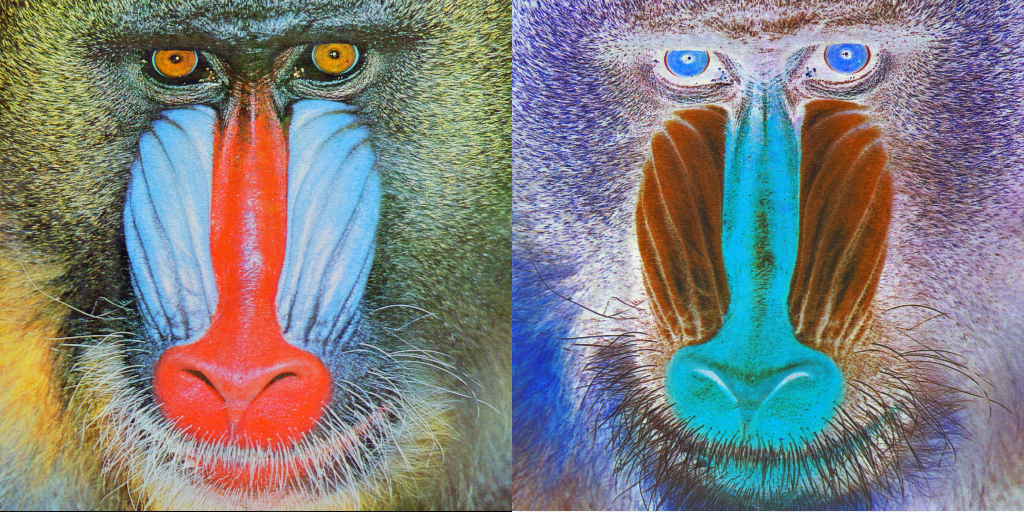

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

inverted_img = 255 - img

final_frame = cv.hconcat((img, inverted_img))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 60
Masukkan nilai kontras : 1.5


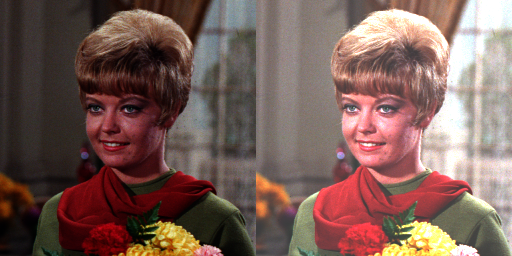

In [7]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))
  contrast = float(input('Masukkan nilai kontras : '))

except ValueError:
  print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip( contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan trasnformasi log
--------------------------------
Masukkan nilai kecerahan : 40


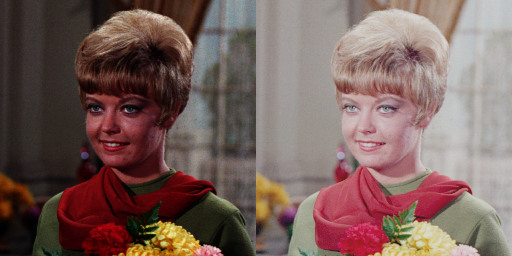

In [8]:
print('Mengubah tingkat kecerahan citra dengan trasnformasi log')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))

except ValueError:
  print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip( brightness * np.log((1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

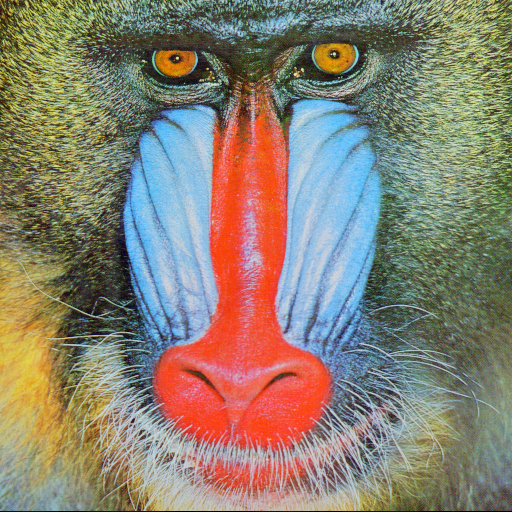

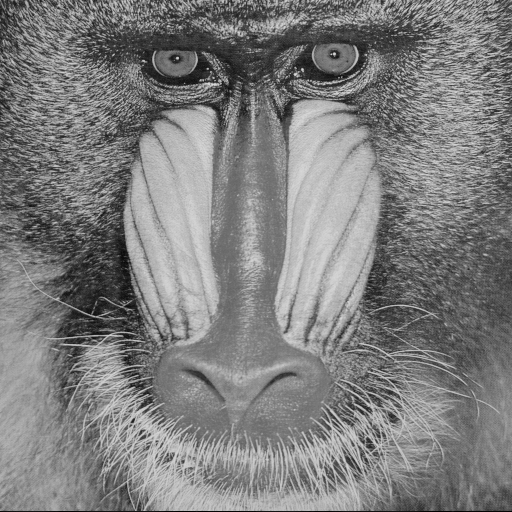

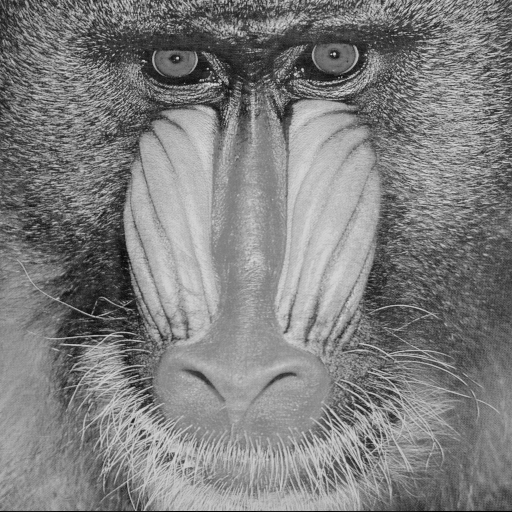

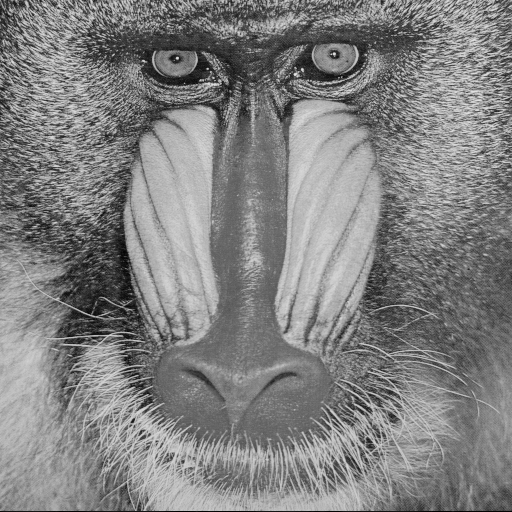

In [3]:

img_ori = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
brightness_image = np.zeros(img_ori.shape, img_ori.dtype)

# Averaging
gray_avg = np.mean(img_ori, axis=2)

# Lightness
gray_lightness = np.max(img_ori, axis=2) / 2 + np.min(img_ori, axis=2) / 2

# Luminance
gray_luminance = 0.21 * img_ori[:, :, 2] + 0.72 * img_ori[:, :, 1] + 0.07 * img_ori[:, :, 0]

cv2_imshow(img_ori)
cv2_imshow(gray_avg)
cv2_imshow(gray_lightness)
cv2_imshow(gray_luminance)



5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

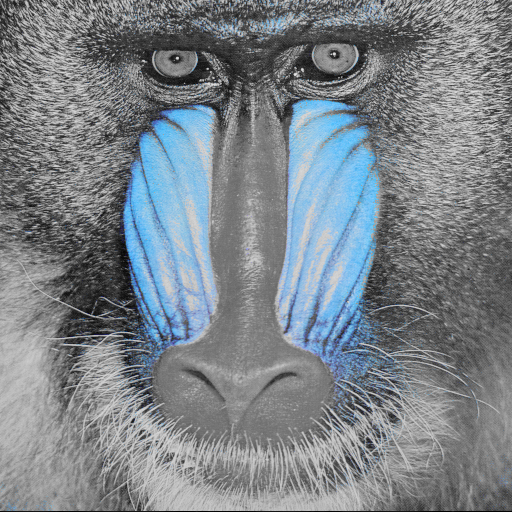

In [16]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

# Ubah ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tentukan rentang warna biru di HSV
lower_blue = np.array([100,50,50])
upper_blue = np.array([130,255,255])

# Ambil mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Terapkan mask ke gambar asli
res = cv.bitwise_and(img,img, mask= mask)

# Ubah gambar asli ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Ubah gambar grayscale ke BGR
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan bagian biru dan bagian grayscale
result = np.where(res != 0, res, gray_bgr)

# Tampilkan hasilnya
cv2_imshow(result)
